<a href="https://colab.research.google.com/github/karim-mammadov/CodeAlpha_Tasks/blob/main/Unemployment_Analysis_with_Python_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup and Data Loading**

This step involves importing the necessary libraries and loading the dataset into a pandas DataFrame.

In [60]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [61]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"karimmammadov1","key":"bd3f40fd258b68cf544b437535a12d7d"}'}

In [62]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [63]:
!kaggle datasets download -d gokulrajkmv/unemployment-in-india

Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india
License(s): other
unemployment-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
with zipfile.ZipFile("unemployment-in-india.zip", 'r') as zip_ref:
    zip_ref.extractall("unemployment_data")

**Data Loading and Preprocessing**

In [65]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/unemployment_data/Unemployment in India.csv')

In [67]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
import numpy as np
import plotly.express as px

In [69]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [71]:
# --- Data Loading (Assuming the file is named '/content/unemployment_data/Unemployment in India.csv' and uploaded to Colab) ---
# NOTE: You will need to upload your CSV file to your Colab environment or mount Google Drive.
# Replace '/content/unemployment_data/Unemployment in India.csv' with your actual file path/name.

try:
    df = pd.read_csv('/content/unemployment_data/Unemployment in India.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The CSV file was not found. Please ensure it is uploaded to your Colab environment.")
    # Exit or provide placeholder DataFrame if needed
    # df = pd.DataFrame()

Data loaded successfully.


**Data Cleaning and Preprocessing**

The primary tasks are to correct column names, handle any missing values, and convert the Date column to the correct datetime format for time-series analysis.

In [72]:
# Standardize column names (remove leading/trailing spaces and make them uniform)
df.columns = df.columns.str.strip()
df.rename(columns={'Region':'State',
                   'Date':'Date',
                   'Estimated Unemployment Rate (%)':'Unemployment_Rate',
                   'Estimated Employed':'Estimated_Employed',
                   'Estimated Labour Participation Rate (%)':'Labour_Participation_Rate'}, inplace=True)

# Check for missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Handle missing values (e.g., check for and possibly fill or drop NaNs if they are few)
# For simplicity in this plan, let's drop rows with any missing data (a more rigorous approach might be needed)
df.dropna(inplace=True)

# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year for easier time-series grouping and analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%b')

# Display the cleaned information
print("\nCleaned Data Info:")
df.info()


Missing values before cleaning:
 State                        28
Date                         28
Frequency                    28
Unemployment_Rate            28
Estimated_Employed           28
Labour_Participation_Rate    28
Area                         28
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployment_Rate          740 non-null    float64       
 4   Estimated_Employed         740 non-null    float64       
 5   Labour_Participation_Rate  740 non-null    float64       
 6   Area                       740 non-null    object        
 7   Year                       740 non-nul

/tmp/ipython-input-3986095738.py:17: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


**Data Exploration: National Trends**

To understand the overall picture, we'll analyze the unemployment rate across the entire period covered by the dataset.

Time-Series Trend of National Unemployment Rate

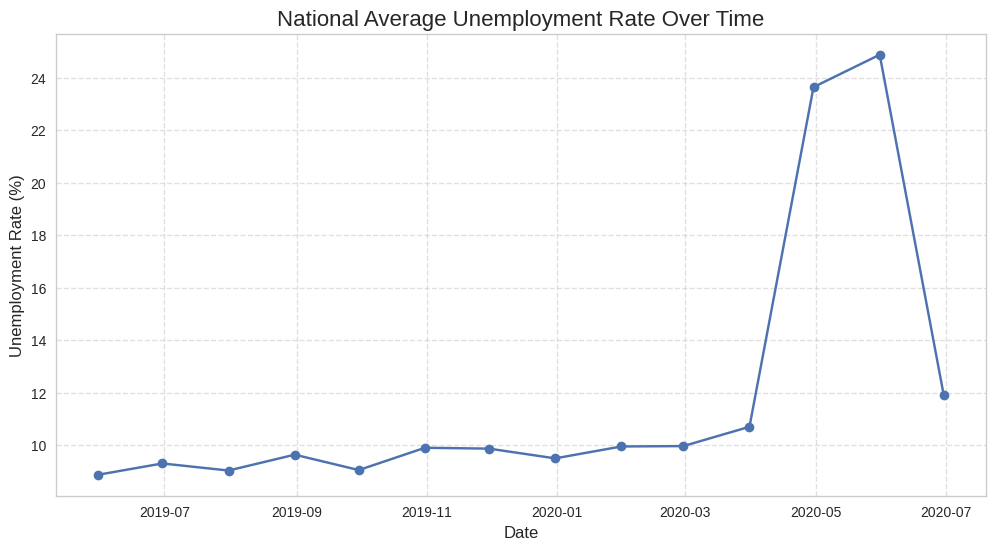

In [73]:
# Calculate the national average unemployment rate per month
national_unemployment = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()

# Plot the national trend
plt.figure(figsize=(12, 6))
plt.plot(national_unemployment['Date'], national_unemployment['Unemployment_Rate'], marker='o', linestyle='-')
plt.title('National Average Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Impact of COVID-19 Lockdown**

The core of the analysis, as indicated by the task context, is the impact of the pandemic. The national lockdown in India began in late March 2020.

Visualize the COVID-19 Spike

In [74]:
# Find the pre- and post-lockdown phases visually
# (A clear spike should be visible around April-May 2020)

fig = px.line(national_unemployment, x='Date', y='Unemployment_Rate',
              title='COVID-19 Impact on India\'s Unemployment Rate',
              markers=True)

# Add an annotation for the severe lockdown period (April 2020)
fig.add_vrect(x0="2020-03-31", x1="2020-06-01",
              fillcolor="red", opacity=0.2, line_width=0,
              annotation_text="Severe Lockdown Phase", annotation_position="top left")

fig.update_layout(xaxis_title="Date", yaxis_title="Unemployment Rate (%)")
fig.show()

**Regional and Seasonal Analysis**

Investigate how unemployment varied across different states and if there are any regular seasonal patterns.

State-wise Comparison (Highest/Lowest)

/tmp/ipython-input-110604422.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




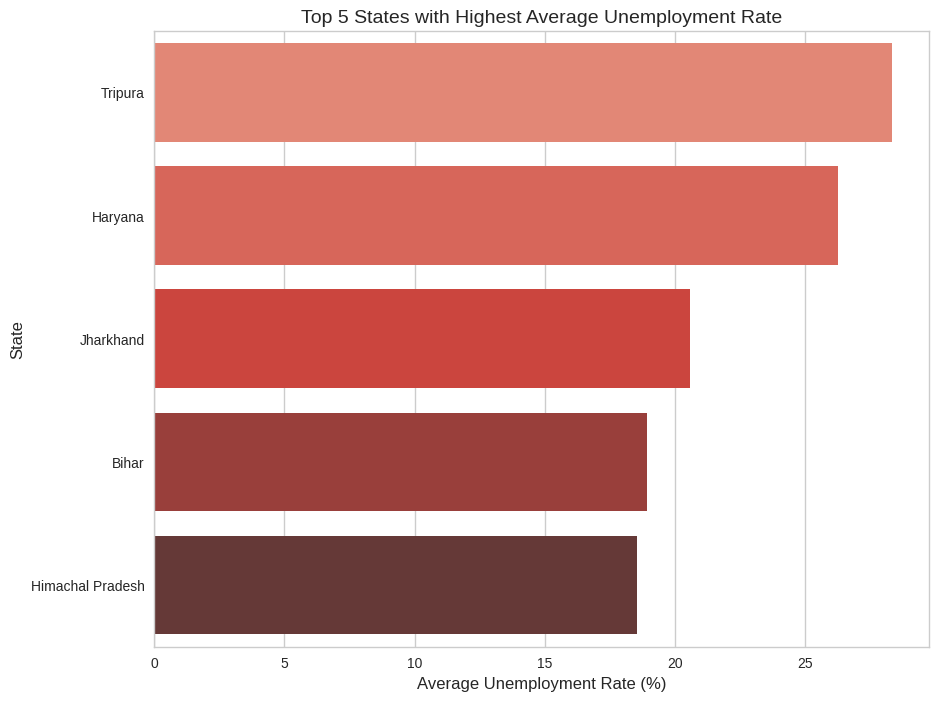

/tmp/ipython-input-110604422.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




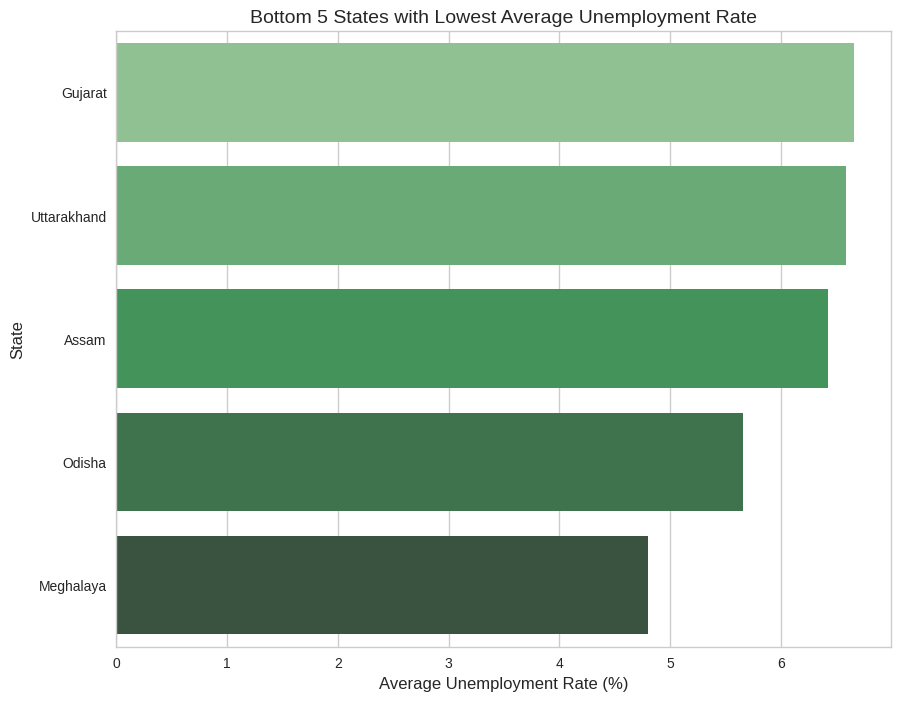

In [77]:
# Calculate the average unemployment rate for each state across the entire dataset
state_avg_unemployment = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False).reset_index()

# Plot the top and bottom 5 states
plt.figure(figsize=(10, 8))
sns.barplot(data=state_avg_unemployment.head(5), x='Unemployment_Rate', y='State', palette='Reds_d')
plt.title('Top 5 States with Highest Average Unemployment Rate', fontsize=14)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show();

plt.figure(figsize=(10, 8))
sns.barplot(data=state_avg_unemployment.tail(5), x='Unemployment_Rate', y='State', palette='Greens_d')
plt.title('Bottom 5 States with Lowest Average Unemployment Rate', fontsize=14)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show();

**Monthly/Seasonal Patterns**

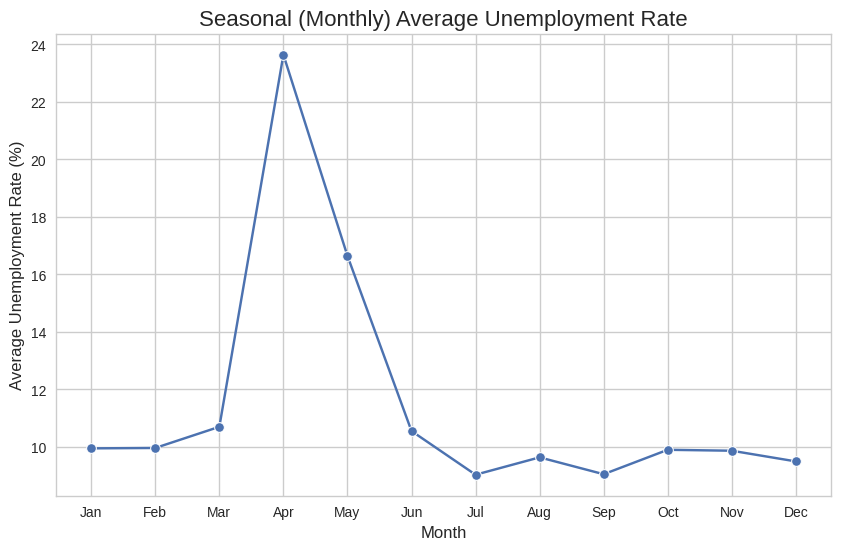

In [76]:
# Check for monthly/seasonal patterns by averaging the rate for each month across all years
monthly_avg_unemployment = df.groupby('Month')['Unemployment_Rate'].mean().reset_index()

# Order the months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_unemployment['Month'] = pd.Categorical(monthly_avg_unemployment['Month'], categories=month_order, ordered=True)
monthly_avg_unemployment = monthly_avg_unemployment.sort_values('Month')

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg_unemployment, x='Month', y='Unemployment_Rate', marker='o')
plt.title('Seasonal (Monthly) Average Unemployment Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.show()

**💡 Primary Insights and Policy Recommendations**

1.Extreme Vulnerability to Economic Shocks (COVID-19 Impact):

*Insight: The national unemployment rate spiked to over 20% during the initial lockdown (April-May 2020), demonstrating that a large segment of the workforce (especially informal and daily-wage laborers) lacks social security or job stability.

*Policy Suggestion: Establish a robust Urban Employment Guarantee Scheme (similar to the rural MGNREGA) to provide a safety net for workers in cities and absorb labor during economic downturns or crises.

2.Addressing Regional Disparity:

*Insight: Unemployment rates show extreme variation, with certain states consistently struggling with high rates, indicating a failure to create sufficient local job opportunities.

*Policy Suggestion: Implement state-specific industrial and skill development policies. For high-unemployment states, incentivize investment in labor-intensive industries and tailor skill training to meet local industry demands.

2.Labour Force Participation Rate (LFPR) Concern:

*Insight: A low LFPR, particularly for women, suggests that many eligible workers are not actively seeking jobs, which can mask the true scale of underemployment. The pandemic may have pushed even more women out of the workforce.

*Policy Suggestion: Focus on increasing Female LFPR by investing in safe transport, providing subsidized childcare facilities, and creating part-time or flexible work opportunities.

3.Managing Seasonal Fluctuations:

*Insight: Consistent monthly variations (if observed, excluding the pandemic) suggest recurring periods of job scarcity.

*Policy Suggestion: Utilize public works programs (like MGNREGA) and vocational training schemes to absorb seasonal surplus labor, especially in the off-season for agriculture.